# Classification

<a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_ML_CLASS/blob/main/dc_supervised_student/01_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this chapter, you'll be introduced to classification problems and learn how to solve them using supervised learning techniques. You'll learn how to split data into training and test sets, fit a model, make predictions, and evaluate accuracy. You’ll discover the relationship between model complexity and performance, applying what you learn to a churn dataset, where you will classify the churn status of a telecom company's customers.


```
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X, y)
predictions = model.predict(X_new)
```

## Setup env

In [ ]:
%pip install scikit-learn matplotlib

# k-Nearest Neighbors: Fit

In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The target, "churn", needs to be a single column with the same number of observations as the feature data. The feature data has already been converted into numpy arrays.

"account_length" and "customer_service_calls" are treated as features because account length indicates customer loyalty, and frequent customer service calls may signal dissatisfaction, both of which can be good predictors of churn.

## Instructions
- Import KNeighborsClassifier from sklearn.neighbors.
- Instantiate a KNeighborsClassifier called knn with 6 neighbors.
- Fit the classifier to the data using the .fit() method.

In [5]:
import pandas as pd
import numpy as np

churn_df = pd.read_csv("https://raw.githubusercontent.com/marcinsawinski/UEP_KIE_ML_CLASS/refs/heads/main/dc_supervised_student/datasets/telecom_churn_clean.csv")
X = churn_df[["account_length", "customer_service_calls"]].values
y = churn_df["churn"].values

In [6]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

# k-Nearest Neighbors: Predict

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

```
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])
```

## Instructions
- Create y_pred by predicting the target values of the unseen features X_new using the knn model.
- Print the predicted labels for the set of predictions.

In [9]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred))

Predictions: [0 1 0]


# Train/test split + computing accuracy

It's time to practice splitting your data into training and test sets with the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y.

## Instructions

- Import train_test_split from sklearn.model_selection.
- Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
- Fit the knn model to the training data.
- Compute and print the model's accuracy for the test data.

In [11]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


# Overfitting and underfitting

Interpreting model complexity is a great way to evaluate supervised learning performance. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.

## Instructions

- Create neighbors as a numpy array of values from 1 up to and including 12.
- Instantiate a KNeighborsClassifier, with the number of neighbors equal to the neighbor iterator.
- Fit the model to the training data.
- Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the train_accuracies and test_accuracies dictionaries, respectively, utilizing the neighbor iterator as the index.

In [12]:
# Create neighbors
neighbors = np.arange(1, 12)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)

	# Fit the model
	knn.fit(X_train, y_train)

	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11] 
 {np.int64(1): 1.0, np.int64(2): 0.8885971492873218, np.int64(3): 0.8994748687171793, np.int64(4): 0.8750937734433608, np.int64(5): 0.878469617404351, np.int64(6): 0.8660915228807202, np.int64(7): 0.8705926481620405, np.int64(8): 0.8615903975993998, np.int64(9): 0.86384096024006, np.int64(10): 0.858589647411853, np.int64(11): 0.8604651162790697} 
 {np.int64(1): 0.7856071964017991, np.int64(2): 0.8470764617691154, np.int64(3): 0.8320839580209896, np.int64(4): 0.856071964017991, np.int64(5): 0.8545727136431784, np.int64(6): 0.8590704647676162, np.int64(7): 0.8605697151424287, np.int64(8): 0.8620689655172413, np.int64(9): 0.863568215892054, np.int64(10): 0.8605697151424287, np.int64(11): 0.8605697151424287}


# Visualizing model complexity

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

## Instructions

- Add a title "KNN: Varying Number of Neighbors".
- Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
- Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
- Display the plot.

In [14]:
import matplotlib.pyplot as plt

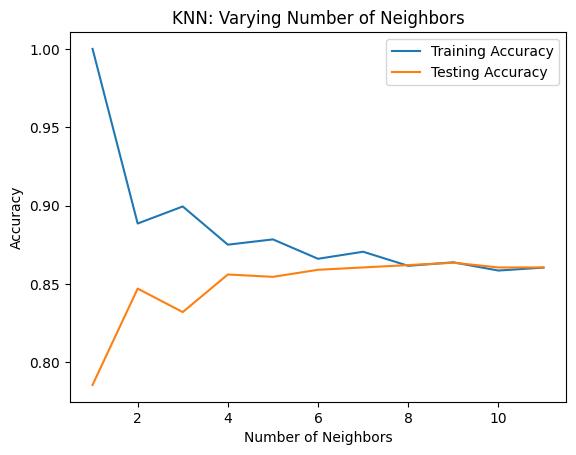

In [16]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [ ]:
best_key = max(test_accuracies, key=test_accuracies.get)
print("Best k =",best_key, "with accuracy =",round(test_accuracies[best_key],4))